# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from  inauguralproject import  HouseholdSpecializationModelClass


# Question 1

**Explain how you solve the model**

Text(0.5, 1.0, 'Ratio of HF to HM')

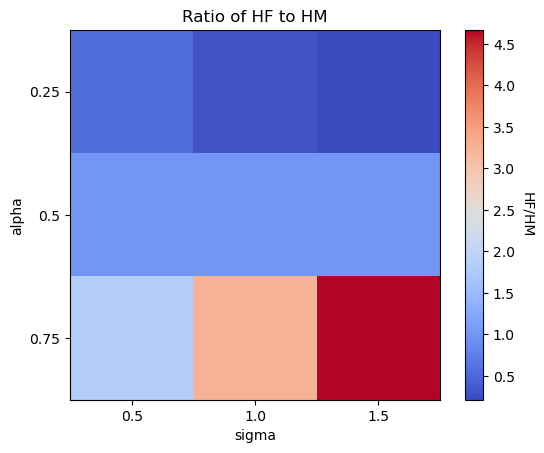

In [3]:

# initialize model
model = HouseholdSpecializationModelClass()

# values of alpha and sigma to investigate
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# initialize array to store ratios
ratios = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop over alpha and sigma values
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        
        # set alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model
        opt = model.solve_discrete()
        
        # calculate ratio
        ratio = opt.HF / opt.HM
        ratios[i, j] = ratio

# plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(ratios, cmap='coolwarm')

# set tick labels
ax.set_xticks(np.arange(len(sigma_vals)))
ax.set_yticks(np.arange(len(alpha_vals)))
ax.set_xticklabels(sigma_vals)
ax.set_yticklabels(alpha_vals)

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('HF/HM', rotation=-90, va="bottom")

# add axis labels
ax.set_xlabel('sigma')
ax.set_ylabel('alpha')

# set title
ax.set_title('Ratio of HF to HM')


# Question 2

Explain your code and procedure

In [ ]:
# To plot $\log\frac{H_{F}}{H_{M}}$ against $\log\frac{w_{F}}{w_{M}}$ for $w_{F}\in[0.8,0.9,1.0,1.1,1.2]$, 
#we first need to solve the model for each value of $w_F$ in the range. We can do this using the solve_wF_vec method of 
#the HouseholdSpecializationModelClass as follows:

# create instance of model
model = HouseholdSpecializationModelClass()

# set range of wF
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# solve model for each wF
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    if discrete:
        opt = model.solve_discrete()
    else:
        opt = model.solve()
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF
    
log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF_wM = np.log(model.par.wF_vec / model.par.wM)


# Question 3

Explain your code and procedure

C:\Users\mauri\AppData\Local\Temp\ipykernel_23688\2729003201.py:11: RuntimeWarning: invalid value encountered in divide
  log_HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)


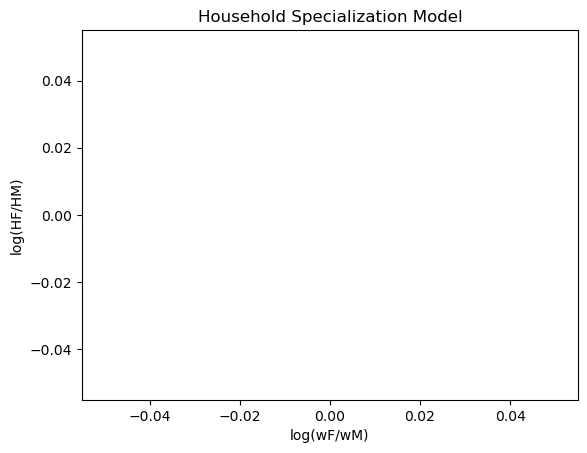

In [4]:
# create model instance
model = HouseholdSpecializationModelClass()

# set wF_vec
model.par.wF_vec = np.linspace(0.8,1.2,5)

# solve model for each value of wF
model.solve_wF_vec()

# calculate log(HF/HM) and log(wF/wM)
log_HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wFwM = np.log(model.par.wF_vec/model.par.wM)

# create plot
plt.plot(log_wFwM, log_HFHM, 'bo-')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.title('Household Specialization Model')
plt.show()


# Question 4

In [ ]:
#code

# Question 5

In [ ]:
#code

ADD CONCISE CONLUSION.